# Información datos (varias bases de datos)

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob as gb
import random
from PIL import Image

## Directorios

In [3]:
train_dir = '/Users/inma/Desktop/tfg/datos/train/'
val_dir = '/Users/inma/Desktop/tfg/datos/valid/'
test_dir = '/Users/inma/Desktop/tfg/datos/test/'

# 1. Reparto de imágenes
Tengo todas las imágenes juntas y voy a hacer la división en train, val y test.

In [4]:
images_path_melanoma = gb.glob("/Users/inma/Desktop/tfg/originales/melanoma/*.jpg")

images_path_nevus = gb.glob("/Users/inma/Desktop/tfg/originales/nevus/*.jpg")

images_path_keratosis = gb.glob("/Users/inma/Desktop/tfg/originales/seborrheic_keratosis/*.jpg")

n_melanoma = len(images_path_melanoma)
n_nevus = len(images_path_nevus)
n_keratosis = len(images_path_keratosis)

print('Número de imágenes de melanoma: ', n_melanoma)
print('Número de imágenes de nevus: ', n_nevus)
print('Número de imágenes de keratosis: ', n_keratosis)

Número de imágenes de melanoma:  1901
Número de imágenes de nevus:  8665
Número de imágenes de keratosis:  1562


In [5]:
images_path_nevus = images_path_nevus[0:1900]
n_nevus = len(images_path_nevus)
print('Número de imágenes de nevus: ', n_nevus)

Número de imágenes de nevus:  1900


Definir la función que cargará las imágenes y las guardará en el directorio correspondiente:

In [6]:
def añade_imagenes(images_path: str, type: str, train_dir: str, val_dir: str, test_dir: str):
    cnt = 0
    for path in images_path:
        img = Image.open(path)
        if cnt < len(images_path)*0.6 :
            img.save(train_dir + type + '/imagen_' + str(cnt) + '.jpg')
        elif cnt >= len(images_path)*0.6 and cnt < len(images_path)*0.8 :
            img.save(val_dir + type + '/imagen_' + str(cnt) + '.jpg')
        else :
            img.save(test_dir + type + '/imagen_' + str(cnt) + '.jpg')
        cnt += 1

Añadir las imágenes:

In [7]:
añade_imagenes(images_path_nevus, 'nevus', train_dir, val_dir, test_dir)

In [8]:
añade_imagenes(images_path_keratosis, 'seborrheic_keratosis', train_dir, val_dir, test_dir)

In [9]:
añade_imagenes(images_path_melanoma, 'melanoma', train_dir, val_dir, test_dir)

# Carga y visualización del reparto de datos

### Comparar número de imágenes
#### 1. Entrenamiento

In [10]:
import glob as gb

images_train_mel = gb.glob("/Users/inma/Desktop/tfg/datos/train/melanoma/*.jpg")
images_train_nev = gb.glob("/Users/inma/Desktop/tfg/datos/train/nevus/*.jpg")
images_train_seb = gb.glob("/Users/inma/Desktop/tfg/datos/train/seborrheic_keratosis/*.jpg")

In [11]:
print("Número de imágenes de melanoma en entrenamiento: ", len(images_train_mel))
print("Número de imágenes de nevus en entrenamiento: ", len(images_train_nev))
print("Número de imágenes de queratosis seborreica en entrenamiento: ", len(images_train_seb))


Número de imágenes de melanoma en entrenamiento:  1141
Número de imágenes de nevus en entrenamiento:  1140
Número de imágenes de queratosis seborreica en entrenamiento:  938


In [12]:
total_train = len(images_train_mel)+len(images_train_nev)+len(images_train_seb)
print("Número de imágenes en entrenamiento: ", total_train)

Número de imágenes en entrenamiento:  3219


In [13]:
porc_train_mel = len(images_train_mel)*100/total_train
porc_train_nev = len(images_train_nev)*100/total_train
porc_train_seb = len(images_train_seb)*100/total_train

In [14]:
print("Porcentaje de imágenes de melanoma en entrenamiento: ", porc_train_mel)
print("Porcentaje de imágenes de nevus en entrenamiento: ", porc_train_nev)
print("Porcentaje de imágenes de queratosis seborreica en entrenamiento: ", porc_train_seb)

Porcentaje de imágenes de melanoma en entrenamiento:  35.44579061820441
Porcentaje de imágenes de nevus en entrenamiento:  35.414725069897486
Porcentaje de imágenes de queratosis seborreica en entrenamiento:  29.139484311898105


### 2. Validación

In [15]:
images_val_mel = gb.glob("/Users/inma/Desktop/tfg/datos/valid/melanoma/*.jpg")
images_val_nev = gb.glob("/Users/inma/Desktop/tfg/datos/valid/nevus/*.jpg")
images_val_seb = gb.glob("/Users/inma/Desktop/tfg/datos/valid/seborrheic_keratosis/*.jpg")

In [16]:
print("Número de imágenes de melanoma en validación: ", len(images_val_mel))
print("Número de imágenes de nevus en validación: ", len(images_val_nev))
print("Número de imágenes de queratosis seborreica en validación: ", len(images_val_seb))

Número de imágenes de melanoma en validación:  380
Número de imágenes de nevus en validación:  380
Número de imágenes de queratosis seborreica en validación:  312


In [17]:
total_val = len(images_val_mel)+len(images_val_nev)+len(images_val_seb)
print("Número de imágenes en validación: ", total_val)

Número de imágenes en validación:  1072


In [18]:
porc_val_mel = len(images_val_mel)*100/total_val
porc_val_nev = len(images_val_nev)*100/total_val
porc_val_seb = len(images_val_seb)*100/total_val

In [19]:
print("Porcentaje de imágenes de melanoma en validación: ", porc_val_mel)
print("Porcentaje de imágenes de nevus en validación: ", porc_val_nev)
print("Porcentaje de imágenes de queratosis seborreica en validación: ", porc_val_seb)

Porcentaje de imágenes de melanoma en validación:  35.44776119402985
Porcentaje de imágenes de nevus en validación:  35.44776119402985
Porcentaje de imágenes de queratosis seborreica en validación:  29.104477611940297


### 3. Test

In [20]:
images_test_mel = gb.glob("/Users/inma/Desktop/tfg/datos/test/melanoma/*.jpg")
images_test_nev = gb.glob("/Users/inma/Desktop/tfg/datos/test/nevus/*.jpg")
images_test_seb = gb.glob("/Users/inma/Desktop/tfg/datos/test/seborrheic_keratosis/*.jpg")

In [21]:
print("Número de imágenes de melanoma en test: ", len(images_test_mel))
print("Número de imágenes de nevus en test: ", len(images_test_nev))
print("Número de imágenes de queratosis seborreica en test: ", len(images_test_seb))

Número de imágenes de melanoma en test:  380
Número de imágenes de nevus en test:  380
Número de imágenes de queratosis seborreica en test:  312


In [22]:
total_test = len(images_test_mel)+len(images_test_nev)+len(images_test_seb) 
print("Número de imágenes en test: ", total_test)

Número de imágenes en test:  1072


In [23]:
porc_test_mel = len(images_test_mel)*100/total_test
porc_test_nev = len(images_test_nev)*100/total_test
porc_test_seb = len(images_test_seb)*100/total_test

In [24]:
print("Porcentaje de imágenes de melanoma en test: ", porc_test_mel)
print("Porcentaje de imágenes de nevus en test: ", porc_test_nev)
print("Porcentaje de imágenes de queratosis seborreica en test: ", porc_test_seb)

Porcentaje de imágenes de melanoma en test:  35.44776119402985
Porcentaje de imágenes de nevus en test:  35.44776119402985
Porcentaje de imágenes de queratosis seborreica en test:  29.104477611940297


## Comparación

In [25]:
total_mel = len(images_train_mel)+len(images_val_mel)+len(images_test_mel)
total_nev = len(images_train_nev)+len(images_val_nev)+len(images_test_nev)
total_seb = len(images_train_seb)+len(images_val_seb)+len(images_test_seb)

total = total_mel+total_nev+total_seb

porc_train = total_train*100/total
porc_val = total_val*100/total
porc_test = total_test*100/total

porc_mel = total_mel*100/total
porc_nev = total_nev*100/total
porc_seb = total_seb*100/total

print("Porcentaje de imágenes en entrenamiento: ", porc_train)
print("Porcentaje de imágenes en test: ", porc_val)
print("Porcentaje de imágenes en test: ", porc_test)

Porcentaje de imágenes en entrenamiento:  60.02237553608055
Porcentaje de imágenes en test:  19.988812231959724
Porcentaje de imágenes en test:  19.988812231959724


2. DataFrame

In [26]:
melanoma = [len(images_train_mel), len(images_val_mel), len(images_test_mel), total_mel]
nevus = [len(images_train_nev), len(images_val_nev), len(images_test_nev), total_nev]
keratosis = [len(images_train_seb), len(images_val_seb), len(images_test_seb), total_seb]
total_etapa = [total_train, total_val, total_test, total]

melanoma_porc = [porc_train_mel, porc_val_mel, porc_test_mel, porc_mel]
nevus_porc = [porc_train_nev, porc_val_nev, porc_test_nev, porc_nev]
keratosis_porc = [porc_train_seb, porc_val_seb, porc_test_seb, porc_seb]
total_etapa_porc = [porc_train, porc_val, porc_test, '100']

df_comparacion = pd.DataFrame(list(zip(melanoma, nevus, keratosis, total_etapa)), columns = ['Melanoma', 'Nevus', 'Keratosis', 'Total Etapa'])
df_comparacion.index = ['Entrenamiento', 'Validación', 'Test', 'Total Tipo']

df_comp_porc = pd.DataFrame(list(zip(melanoma_porc, nevus_porc, keratosis_porc, total_etapa_porc)), columns = ['Melanoma', 'Nevus', 'Keratosis', 'Total Etapa'])
df_comp_porc.index = ['Entrenamiento', 'Validación', 'Test', 'Total Tipo']

In [27]:
df_comparacion

,Melanoma,Nevus,Keratosis,Total Etapa
Entrenamiento,1141,1140,938,3219
Validación,380,380,312,1072
Test,380,380,312,1072
Total Tipo,1901,1900,1562,5363


In [28]:
df_comp_porc

,Melanoma,Nevus,Keratosis,Total Etapa
Entrenamiento,35.445791,35.414725,29.139484,60.022376
Validación,35.447761,35.447761,29.104478,19.988812
Test,35.447761,35.447761,29.104478,19.988812
Total Tipo,35.446578,35.427932,29.125489,100


#### Guardar tablas

In [29]:
df_comparacion.to_csv("resultados/12-tabla_numero_images_2.csv")
df_comp_porc.to_csv("resultados/13-tabla_porcentaje_imagenes_2.csv")

### Gráficas
1. Porcentaje de imágenes en cada etapa

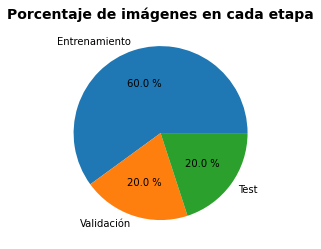

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie([total_train, total_val, total_test], labels=["Entrenamiento", "Validación", "Test"], autopct="%0.1f %%")
ax.set_title('Porcentaje de imágenes en cada etapa', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.savefig("resultados/14-grafica_queso_porcentaje_imagenes_2.png")
plt.show()

2. Número de imágenes en cada etapa

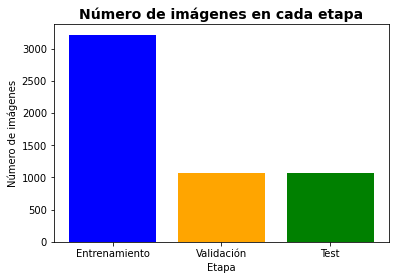

In [31]:
fig, ax = plt.subplots()
ax.bar(["Entrenamiento", "Validación", "Test"], [total_train, total_val, total_test], color=['blue', 'orange', 'green'])
ax.set_title('Número de imágenes en cada etapa', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.xlabel('Etapa')
plt.ylabel('Número de imágenes')
plt.savefig("resultados/15-grafica_barras_imagenes_etapa_2.png")
plt.show()

3. Número de imágenes por etapa y tipo

In [32]:
numero_de_grupos = 3
indice_barras = np.arange(numero_de_grupos)
ancho_barras = 0.3

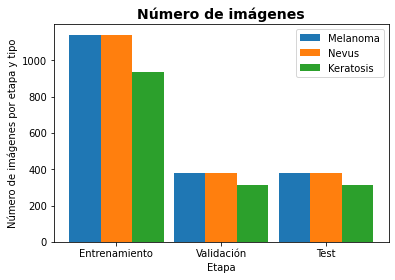

In [33]:
fig, ax = plt.subplots()

ax.bar(indice_barras, [len(images_train_mel), len(images_val_mel), len(images_test_mel)], width=ancho_barras, label = "Melanoma")
ax.bar(indice_barras + ancho_barras, [len(images_train_nev), len(images_val_nev), len(images_test_nev)], width=ancho_barras, label = "Nevus")
ax.bar(indice_barras + 2*ancho_barras, [len(images_train_seb), len(images_val_seb), len(images_test_seb)], width=ancho_barras, label = "Keratosis")

plt.legend(loc='best')
plt.xticks(indice_barras + ancho_barras, ("Entrenamiento", "Validación", "Test"))

ax.set_title('Número de imágenes', loc = "center", fontdict = {'fontsize':14, 'fontweight':'bold'})
plt.xlabel('Etapa')
plt.ylabel('Número de imágenes por etapa y tipo')
plt.savefig("resultados/16-grafica_barras_imagenes_etapa_tipo_2.png")
plt.show()

## Data Augmentation en keratosis
Para igualar aún más el número de imágenes de cada tipoo, vamos a aumentar 100 imágenes para keratosis:

In [34]:
def augmentation(image):
    
    rng = tf.random.Generator.from_seed(random.randint(0,1000), alg='philox')
    seed = rng.make_seeds(2)[0]
    
    image_tuned = image.resize((224,224))
    image_tuned = tf.image.stateless_random_brightness(image_tuned, max_delta=0.1, seed=seed)
    image_tuned = tf.image.stateless_random_contrast(image_tuned, lower=0.7, upper=0.9, seed=seed)
    image_tuned = tf.image.stateless_random_crop(image_tuned, size=[200, 200, 3], seed=seed)
    image_tuned = tf.image.stateless_random_flip_left_right(image_tuned, seed=seed)
    image_tuned = tf.image.stateless_random_flip_up_down(image_tuned, seed=seed)
    image_tuned = tf.image.stateless_random_saturation(image_tuned, lower=0.8, upper=1, seed=seed)
    
    return image_tuned

In [35]:
def crea_imagenes(input_paths, output_path):
    cnt = 0
    for image_path in input_paths:
        img_original = Image.open(image_path)
        img = augmentation(img_original).numpy()
        img = Image.fromarray(img)
        img.save(output_path+"aumentada_"+str(cnt)+".jpg")  
        cnt += 1
        if cnt >= 100:
            break

In [36]:
keratosis_path = train_dir+'seborrheic_keratosis/'
keratosis_path

'/Users/inma/Desktop/tfg/datos/train/seborrheic_keratosis/'

In [37]:
crea_imagenes(images_path_keratosis, keratosis_path)

2022-04-27 22:48:11.219232: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
